# Task
The ProfessionAI company wants to make a library capable of doing analysis of received emails.

Specifically, the CEO has requested to identify SPAM-type emails on which to do content analysis.

The CTO specifically provides you with a dataset and asks you to:
- Train a classifier to identify SPAM
- Identify the main Topics among the SPAM emails in the dataset
- Calculate the semantic distance between the obtained topics to infer heterogeneity.
- Extract from the NON SPAM emails the Organizations present.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
URL = 'https://raw.githubusercontent.com/ProfAI/natural-language-processing/main/datasets/Verifica%20Finale%20-%20Spam%20Detection/spam_dataset.csv'

In [ ]:
df = pd.read_csv(URL,index_col=0)

# EDA

In [ ]:
df.sample(10)

,label,text,label_num
5008,spam,Subject: via - ggra is lousy mizar\nanti\ncurb...,1
2415,ham,"Subject: hpl noms . for jan . 19 , 2001\n( see...",0
2854,ham,Subject: on call notes\nfriday 3 / 23 - receiv...,0
4437,spam,Subject: regarding wamu checking account urgen...,1
324,ham,"Subject: re : 98 - 6892 overflow\ndaren ,\nper...",0
5026,spam,Subject: us hot sto - cks\nstructure technolog...,1
1486,ham,Subject: cornshucker\nhere are the points the ...,0
3274,ham,Subject: fw : kick\nthis looks painful !\n- - ...,0
1142,ham,Subject: revision # 1 - enron / hpl actuals fo...,0
4768,spam,Subject: use the links to get more information...,1


5171

------------------------------


label        0
text         0
label_num    0
dtype: int64

------------------------------


label
ham     3672
spam    1499
Name: count, dtype: int64

<Axes: ylabel='label'>

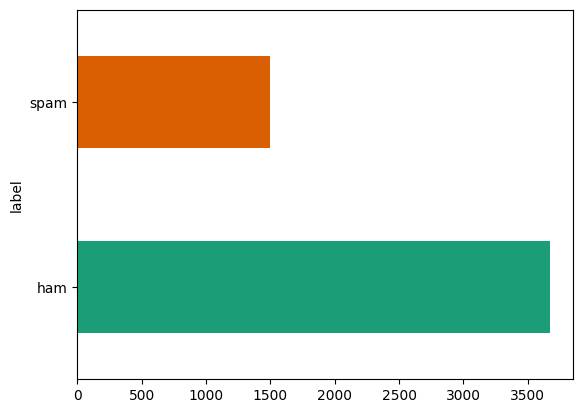

In [ ]:
len(df)
print('-'*30)
df.isnull().sum()
print('-'*30)
df['label'].value_counts()
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
#print example of non-spam mail
df['text'][2]

'Subject: calpine daily gas nomination\n- calpine daily gas nomination 1 . doc'

In [ ]:
#print example of spam mail
df['text'][335]

'Subject: purchasing computer equipment\nin order to ensure that all computer - related equipment is being properly\ncapitalized and not expensed in your rc , i would like to centralize the\npurchase of equipment for energy operations . going forward , if you need to\npurchase equipment for a new employee or need to upgrade your existing pc\nand / or monitor , please send me an e - mail containing the following information :\nemployee name ( indicate if the employee is new )\nlocation\nphone extension\nequipment you would like to purchase\nexisting system number if upgrading your pc\ni have set up an rc exclusively to capture purchases of computer - related\nequipment . this will make it easier to properly capitalize these assets .\none more thing i need for each of you to do . please review your rc reports\nfor january 2000 and make sure that there aren \' t any pc purchases charged to\nyour rc . you can find them in cost category 601 " non - capitalized hardware\nand software " . if 

# Classification model

## Cleaning text

In [ ]:
# import utils for dataset cleaning
import string
import re
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


nlp = spacy.load('en_core_web_sm')
en_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(sentences):
  special_char = ["\n", "\t", "/", "\\"] # list of some special char
# 1. Lowering
  sentences = sentences.lower()
# 2. Removing punctation, digits and special characters
  for c in string.punctuation:
    sentences = sentences.replace(c, " ")

  sentences = re.sub(r'\d','',sentences)

  for c in special_char:
    sentences = sentences.replace(c, ' ')
# 3. Lemmatization
  doc = nlp(sentences)
  sentences = ' '.join(token.lemma_ for token in doc)
# 4. Removing stopwords and check if word is longer than four
  sentences = ' '.join(word for word in sentences.split() if word not in en_stopwords and len(word)>=4)
# 5. Removing white spaces
  sentences = re.sub(' +', ' ', sentences) # check if there's +2 white spaces and replace them whith only 1
  return sentences

In [ ]:
# cleaning dataset
df['clean_text'] = df['text'].apply(lambda x: clean_text(x))

In [ ]:
# compare clean and unclean mails
df[['text', 'clean_text']].sample(10)

,text,clean_text
3364,Subject: new tax law update\nwhether you ' re ...,subject update whether invest education retire...
265,Subject: 2000 goals & objectives\n- - - - - - ...,subject goal objective forward beth ryan brian...
2373,Subject: can we still be friends\nthis has not...,subject still friend good want thank help give...
1296,Subject: 75 th anniversary celebration\nthank ...,subject anniversary celebration thank fantasti...
4017,"Subject: re : your account # ln 869\nhi ,\ni s...",subject account send email last week want conf...
5092,Subject: u . s . robotics - analogue / wired c...,subject robotic analogue wire charset ascii pr...
915,"Subject: hpl noms for june 08 , 2000\n( see at...",subject june attach file lsno lsno
3027,"Subject: wellhead adjustments\ndaren ,\nplease...",subject wellhead adjustment daren please attac...
1977,"Subject: enron / hpl actuals for november 2 , ...",subject enron actual november teco enron daily
1845,Subject: lunch\ntreebeard ' s\n?\ni am hooked ...,subject lunch treebeard hook name time place m...


In [ ]:
# Looking for the lenght of mails after cleaning and how many of them are smaller than 3 words
df['word_counts'] = df['clean_text'].str.split().str.len()

df[df['word_counts']<3].sample(15)
print('='*70)
print(f"There are {len(df[df['word_counts']<3])} mails with less than three words")



,label,text,label_num,clean_text,word_counts
4241,spam,Subject: you can be smart !\n,1,subject smart,2
4705,spam,Subject: \n,1,subject,1
5077,spam,Subject: ? ? ? ? 13 ? ? ? ? ? ? ? * ? * ? * ?\...,1,subject,1
3787,spam,Subject: no more injections\n,1,subject injection,2
926,ham,Subject: re : hoop it up\n281 . 343 . 8233,0,subject hoop,2
4592,spam,Subject: \n,1,subject,1
4682,spam,Subject: \n,1,subject,1
4141,spam,Subject: \n,1,subject,1
4690,spam,Subject: \n,1,subject,1
1264,ham,Subject: nom\n-\n- hpl - aug . xls,0,subject,1


There are 34 mails with less than three words


In [ ]:
# Delete small mails

df = df[df['word_counts'].apply(lambda x: x > 3)]
print(f"There are {len(df[df['word_counts']<3])} mails with less than three words")

There are 0 mails with less than three words


In [ ]:
# extract most common word in the dataset
token_list = df['clean_text'].apply(lambda x: x.split())
all_tokens = [token for sublist in token_list for token in sublist]
word_freq = Counter(all_tokens)

# print 20 most common word
word_freq.most_common(20)

[('subject', 7998),
 ('enron', 6555),
 ('deal', 3651),
 ('please', 3199),
 ('meter', 2718),
 ('thank', 2238),
 ('need', 2074),
 ('daren', 1901),
 ('forward', 1826),
 ('corp', 1776),
 ('know', 1695),
 ('volume', 1684),
 ('price', 1624),
 ('company', 1428),
 ('change', 1352),
 ('mmbtu', 1352),
 ('http', 1235),
 ('send', 1229),
 ('contract', 1176),
 ('farmer', 1156)]

### Comment
As I have seen that there are many repetitive words that cannot be useful in training the model (e.g. 'subject', 'http', etc.) I decide to remove them manually

In [ ]:
def remove_useless_words(sentences):
  useless_words = ['subject','http', 'mailto', 'mail', 'email']
  for c in useless_words:
    sentences = sentences.replace(c, '')
  # remove possible +2 white spaces
  sentences = re.sub(' +', ' ', sentences)
  return sentences

df['clean_text'] = df['clean_text'].apply(lambda x: remove_useless_words(x))
#ham_df['clean_text'] = ham_df['clean_text'].apply(lambda x: remove_useless_words(x))
#spam_df['clean_text'] = spam_df['clean_text'].apply(lambda x: remove_useless_words(x))

# extract most common word in the dataset
token_list = df['clean_text'].apply(lambda x: x.split())
all_tokens = [token for sublist in token_list for token in sublist]
word_freq = Counter(all_tokens)

# print 20 most common word
word_freq.most_common(20)

[('enron', 6555),
 ('deal', 3651),
 ('please', 3199),
 ('meter', 2718),
 ('thank', 2238),
 ('need', 2074),
 ('daren', 1901),
 ('forward', 1826),
 ('corp', 1776),
 ('know', 1695),
 ('volume', 1684),
 ('price', 1624),
 ('company', 1428),
 ('change', 1352),
 ('mmbtu', 1352),
 ('send', 1229),
 ('contract', 1176),
 ('farmer', 1156),
 ('information', 1155),
 ('time', 1111)]

## Word2Vec

In [ ]:
import gensim.downloader
from gensim.models import Word2Vec

In [ ]:
# dowload pre-trained word2vec model from gensim
glove_model = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# fuction to vectorize sentence with Word2Vec

def text_to_vector(text, model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    if not word_vectors:  # handle cases where none of the words are in the model
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)


In [ ]:
df['text_w2v'] = df['clean_text'].apply(lambda x: text_to_vector(x, glove_model))

## Model construction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
RANDOM_SEED = 97

In [ ]:
x = np.stack(df['text_w2v'].values)
y = df['label_num'].values

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=.2, random_state=RANDOM_SEED)

In [ ]:
len(x_train)
len(x_test)

4086

1022

### Model train
I decide to use a simple logistic regression to test how the cleananing and vectorization of mails can performs.
If the metrics are to low I'll try more "complex" models

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

LogisticRegression()

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       731
           1       0.93      0.91      0.92       291

    accuracy                           0.96      1022
   macro avg       0.95      0.94      0.95      1022
weighted avg       0.96      0.96      0.96      1022



### Comment
Even if the dataset is slighty unbalanced on spam-mails the model with logistic regression perform in a good manner -> f1 score on positive classification is 0.92

# NER

In [ ]:
# create ham and spam df for next tasks
spam_df = df[df['label_num']==1]
ham_df = df[df['label_num']==0]

len(ham_df)
ham_df.sample(10)
print('='*85)
len(spam_df)
spam_df.sample(10)

3659

,label,text,label_num,clean_text,word_counts,text_w2v
3342,ham,"Subject: valero rfp and gas data\ndaren ,\ntom...",0,valero datum daren martin want send info rega...,197,"[0.06582588, 0.07966219, -0.10001419, -0.05680..."
668,ham,"Subject: ena organizational changes\nena  , s...",0,organizational change first quarter performan...,247,"[0.018653614, 0.06370349, 0.0083076535, -0.154..."
1658,ham,Subject: shell meter 1581\nthis meter is comin...,0,shell meter meter come back effective today b...,12,"[-0.08163121, 0.121824116, -0.2938292, -0.1135..."
2272,ham,Subject: work assignments\nmike\ni see that yo...,0,work assignment mike alot thing error report ...,48,"[-0.1044027, 0.08511129, -0.06800633, -0.02593..."
888,ham,Subject: mary poorman interview schedule\nplea...,0,mary poorman interview schedule please advise...,22,"[-0.11537578, -0.06018638, -0.06975457, 0.1363..."
1983,ham,Subject: enron / hpl actuals for november 3 - ...,0,enron actual november november teco enron dai...,16,"[0.11050186, 0.006493608, -0.026009342, -0.070..."
611,ham,Subject: re : sitara release ( re : changes in...,0,sitara release change global consent assignme...,664,"[-0.05468724, -0.034687847, -0.080992706, -0.0..."
1410,ham,Subject: channel dispatch 08 / 17 / 00\nfyi\n-...,0,channel dispatch forward gary hank weir gordo...,88,"[0.0074330894, -0.015435614, 0.038865235, 0.05..."
1888,ham,Subject: write off of meter 74 volumes\naimee ...,0,write meter volume aimee volume determine wri...,46,"[-0.113478586, -0.06589199, -0.06652598, -0.06..."
19,ham,Subject: ua 4 - meter 1441 for 11 / 97 - falfu...,0,meter falfurria daren need help resolve issue...,21,"[-0.057768475, 0.1328462, -0.1440548, -0.05236..."


1449

,label,text,label_num,clean_text,word_counts,text_w2v
4680,spam,Subject: stop overpaying for via . gra\nthis l...,1,stop overpay little know pharmacy site become...,38,"[-0.0890263, 0.0907317, 0.10289173, -0.0787773..."
4712,spam,Subject: featured company earns highest rating...,1,feature company earn high rating year tiger t...,564,"[-0.068921775, 0.04349428, 0.036338225, -0.094..."
4677,spam,Subject: the daily stock barometer\ninvestor a...,1,daily stock barometer investor aiert brand st...,658,"[-0.085800946, 0.056397393, -0.01888983, -0.05..."
4229,spam,Subject: rock her world with the little pill !...,1,rock world little pill click remove,7,"[-0.30483484, 0.06220733, -0.100845, -0.135173..."
5134,spam,Subject: hp ink cartridges special\nink cartri...,1,cartridge special cartridge special original ...,164,"[-0.1439908, 0.037525438, -0.0741677, -0.08223..."
4319,spam,Subject: how to earn thousands writing google ...,1,earn thousand write google adword part time k...,159,"[-0.0014454258, 0.04040912, -0.06564453, -0.04..."
3973,spam,Subject: you can start saving nab\nre - financ...,1,start save finance even credit good finance r...,30,"[-0.010562717, -0.017924761, -0.082466304, 0.0..."
4572,spam,Subject: instant download 1300 popular softwar...,1,instant download popular software lose play r...,62,"[-0.257921, 0.052028842, -0.035953883, -0.0320..."
4237,spam,"Subject: precis who ' ve mirth\npaliourg , !\n...",1,precis mirth paliourg valiumxanaxciali hydroc...,43,"[-0.040869445, -0.01861673, -0.069258995, 0.06..."
4480,spam,Subject: special invitation to attend - e - fi...,1,special invitation attend financial worldexpo...,323,"[-0.049025916, -0.021234134, -0.020280767, -0...."


In [ ]:
# function to extract organization with SpaCy
def extract_organizations(sentence):
  organization = []
  doc = nlp(sentence)
  for token in doc:
    if str(token.ent_type_) == 'ORG':
      organization.append(str(token))

  return organization


# Function to save for each ham mail the organization extracted in a dictionary
def process_emails(df):
  to_return = {}
  for i, email in enumerate(df):
    email_key = f'Email_{i+1}'
    orgs = extract_organizations(email)
    to_return[email_key] = orgs
  return to_return

In [ ]:
organization_dict = process_emails(ham_df['clean_text'])

In [ ]:
# whatch first 10 mails
list(organization_dict.items())[:10]

[('Email_1', []),
 ('Email_2', []),
 ('Email_3', ['shop', 'antique']),
 ('Email_4', []),
 ('Email_5', []),
 ('Email_6',
  ['locker',
   'kids',
   'foot',
   'locker',
   'store',
   'foot',
   'locker',
   'canada',
   'participate',
   'program',
   'locker',
   'canada',
   'participate']),
 ('Email_7', []),
 ('Email_8', []),
 ('Email_9', ['enron', 'enron', 'daily']),
 ('Email_10', ['tenaska'])]

In [ ]:
# Transform dict in a dataframe
org_df = pd.DataFrame(organization_dict.items(), columns=['Emails', 'Organizations'])

# set email number as index
org_df.set_index('Emails', inplace = True)

# Delet empty email
org_df = org_df[org_df['Organizations'].apply(lambda x: len(x) > 0)]

# Extract str values from list
org_df['Organizations'] = org_df['Organizations'].apply(lambda x: ','.join(x))

In [ ]:
len(org_df)
org_df.sample(20)

1679

,Organizations
Emails,
Email_2715,texaco
Email_1975,tenaska
Email_3176,"enron,teco,iferc,enron,enron,enron,enron"
Email_1155,"boas,sherlyn,schumack,copano,boas,stella,morri..."
Email_106,"wynne,clynes,corp,enron,enron,daren,clyne,corp..."
Email_1762,"enron,mark,palmer,corp,enron,mccabe,corp,enron..."
Email_3405,"chokshi,corp"
Email_413,"subj,astro,dfarmer,enron,city"
Email_3625,"edison,edison,edison,ferc,commonwealth,edison,..."


In [ ]:
orgs = org_df['Organizations'].str.split(',', expand=True)
all_orgs = [token for sublist in orgs.values for token in sublist if token]
orgs_freq = Counter(all_orgs)

In [ ]:
twenty_orgs = orgs_freq.most_common(20)
twenty_orgs

[('enron', 2681),
 ('corp', 1254),
 ('tenaska', 273),
 ('chokshi', 206),
 ('hplc', 146),
 ('clyne', 143),
 ('north', 128),
 ('america', 127),
 ('exxon', 109),
 ('texas', 104),
 ('parker', 103),
 ('acton', 102),
 ('daren', 90),
 ('dfarmer', 77),
 ('megan', 64),
 ('mobil', 64),
 ('meter', 64),
 ('houston', 63),
 ('energy', 58),
 ('morris', 57)]

<Figure size 1500x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Organizations')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Most Frequent Organizations in Non-Spam Emails')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'enron'),
  Text(1, 0, 'corp'),
  Text(2, 0, 'tenaska'),
  Text(3, 0, 'chokshi'),
  Text(4, 0, 'hplc'),
  Text(5, 0, 'clyne'),
  Text(6, 0, 'north'),
  Text(7, 0, 'america'),
  Text(8, 0, 'exxon'),
  Text(9, 0, 'texas'),
  Text(10, 0, 'parker'),
  Text(11, 0, 'acton'),
  Text(12, 0, 'daren'),
  Text(13, 0, 'dfarmer'),
  Text(14, 0, 'megan'),
  Text(15, 0, 'mobil'),
  Text(16, 0, 'meter'),
  Text(17, 0, 'houston'),
  Text(18, 0, 'energy'),
  Text(19, 0, 'morris')])

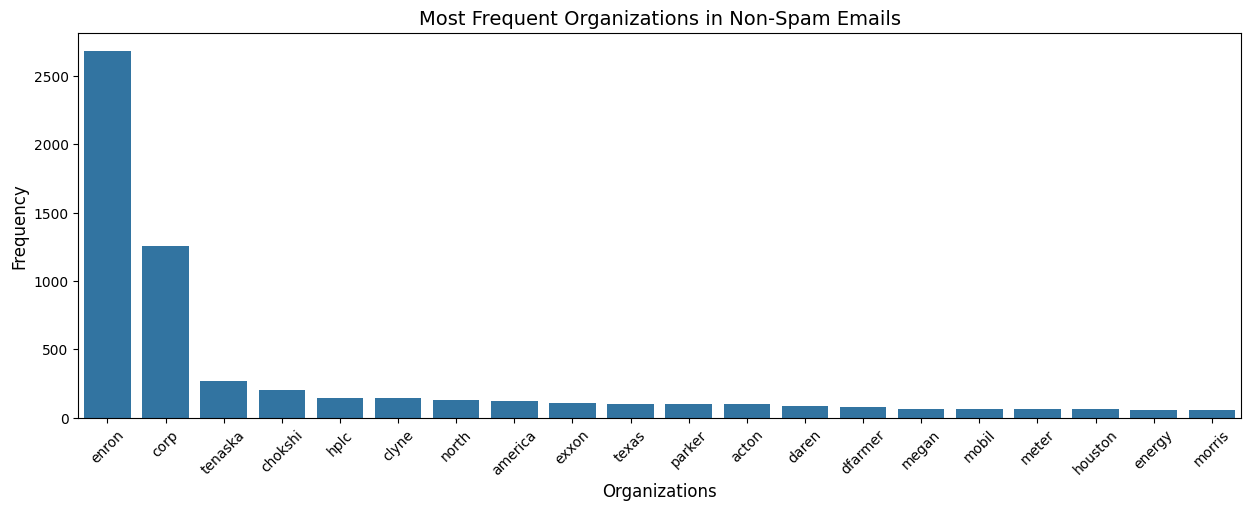

In [ ]:
# Plot distrubution of twenty_orgs

# Create the bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=[org for org, freq in twenty_orgs], y=[freq for org, freq in twenty_orgs])

# Add labels and title
plt.xlabel("Organizations", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Most Frequent Organizations in Non-Spam Emails", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Comment
The name extraction of the organisations went quite well. One can see how the main mails came from Enron.
However, there are some errors such as 'Corp', 'North', 'America'
In the totality I can still be satisfied

# Topic Modelling and Semantic Distance

In [ ]:
from wordcloud import WordCloud

In [ ]:
spam_df.head()

,label,text,label_num,clean_text,word_counts,text_w2v
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop window office cheap main trending a...,44,"[-0.05498936, 0.020605082, 0.08874275, 0.02255..."
4185,spam,Subject: looking for medication ? we ` re the ...,1,look medication good source difficult make ma...,63,"[-0.06632147, 0.036956962, 0.027704602, -0.029..."
4922,spam,Subject: vocable % rnd - word asceticism\nvcsc...,1,vocable word asceticism vcsc brand stock atte...,573,"[-0.123206936, 0.031912822, -0.0048270426, -0...."
3799,spam,Subject: report 01405 !\nwffur attion brom est...,1,report wffur attion brom inst siupie pgst riw...,31,"[-0.07162158, -0.009882995, -0.11969842, 0.228..."
3948,spam,Subject: vic . odin n ^ ow\nberne hotbox carna...,1,odin berne hotbox carnal bride cutworm dyadic...,44,"[0.0036015746, 0.014181015, -0.042914297, 0.03..."


I decice to create a wordlcoud to see which are the words that occurs most

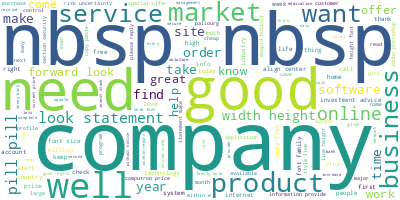

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
text = ' '.join(spam_df['clean_text'].astype(str))
wordcloud.generate(text)
wordcloud.to_image()

<ipython-input-37-e4861d269fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['clean_text'] = spam_df['clean_text'].apply(lambda x: x.replace('nbsp',''))


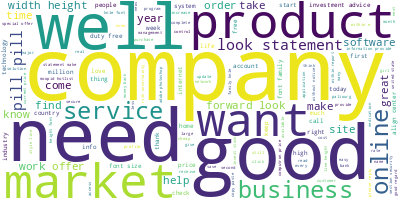

In [ ]:
# I delete 'nbsp' word which is a html withe space
spam_df['clean_text'] = spam_df['clean_text'].apply(lambda x: x.replace('nbsp',''))

text = ' '.join(spam_df['clean_text'].astype(str))
wordcloud.generate(text)
wordcloud.to_image()

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.9 MB/s eta 0:00:00


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from pprint import pprint

In [ ]:
# Tokenize the text in each row of the 'clean_text' column
tokenized_texts = spam_df['clean_text'].apply(lambda x: x.split())

# Create the dictionary
id2word = corpora.Dictionary(tokenized_texts)
# Create corpus
corpus = [id2word.doc2bow(text) for text in tokenized_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, num_topics = 20, passes = 10)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus] # save documents divided in list of topics
print('='*50)

# Compute Perplexity
perplexity_lda = lda_model.log_perplexity(corpus)
print(f'Perplexity Score: {perplexity_lda:.2f}')

print('='*50)
# Compute Coherence
coherence_model_lda = CoherenceModel(model = lda_model, texts=tokenized_texts,
									dictionary = id2word, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.2f}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.005*"microsoft" + 0.004*"source" + 0.004*"normally" + 0.003*"please" + '
  '0.003*"citibank" + 0.003*"sofftwaare" + 0.003*"palestinian" + 0.003*"epson" '
  '+ 0.003*"need" + 0.003*"card"'),
 (1,
  '0.013*"statement" + 0.010*"company" + 0.007*"look" + 0.007*"forward" + '
  '0.007*"share" + 0.006*"security" + 0.006*"within" + 0.006*"event" + '
  '0.005*"price" + 0.005*"time"'),
 (2,
  '0.007*"claim" + 0.006*"number" + 0.005*"prize" + 0.004*"part" + 0.004*"e" + '
  '0.004*"please" + 0.004*"program" + 0.004*"lottery" + 0.004*"promotion" + '
  '0.003*"address"'),
 (3,
  '0.024*"pill" + 0.012*"online" + 0.007*"account" + 0.006*"money" + '
  '0.006*"order" + 0.006*"medication" + 0.005*"viagra" + 0.005*"health" + '
  '0.005*"need" + 0.005*"prescription"'),
 (4,
  '0.006*"price" + 0.006*"wysak" + 0.006*"prescription" + 0.005*"many" + '
  '0.004*"today" + 0.003*"stop" + 0.003*"special" + 0.003*"drug" + '
  '0.003*"online" + 0.003*"basin"'),
 (5,
  '0.003*"find" + 0.003*"meet" + 0.002*"

In [ ]:
lda_model2 = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, num_topics = 10, passes = 10)

pprint(lda_model2.print_topics())
doc_lda2 = lda_model2[corpus] # save documents divided in list of topics
print('='*50)

# Compute Perplexity
perplexity_lda2 = lda_model2.log_perplexity(corpus)
print(f'Perplexity Score: {perplexity_lda2:.2f}')

print('='*50)
# Compute Coherence
coherence_model_lda = CoherenceModel(model = lda_model2, texts=tokenized_texts,
									dictionary = id2word, coherence = 'c_v')
coherence_lda2 = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda2:.2f}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.004*"claim" + 0.003*"prize" + 0.003*"part" + 0.003*"number" + '
  '0.003*"full" + 0.003*"story" + 0.002*"january" + 0.002*"name" + '
  '0.002*"promotion" + 0.002*"e"'),
 (1,
  '0.013*"computron" + 0.010*"contact" + 0.009*"remove" + 0.008*"message" + '
  '0.007*"free" + 0.007*"please" + 0.006*"price" + 0.006*"link" + 0.005*"sale" '
  '+ 0.005*"list"'),
 (2,
  '0.011*"adobe" + 0.010*"price" + 0.009*"window" + 0.009*"professional" + '
  '0.007*"office" + 0.006*"software" + 0.006*"photoshop" + 0.005*"microsoft" + '
  '0.005*"corel" + 0.004*"macromedia"'),
 (3,
  '0.013*"pill" + 0.007*"viagra" + 0.005*"cialis" + 0.004*"prescription" + '
  '0.004*"order" + 0.004*"drug" + 0.004*"soft" + 0.004*"good" + 0.004*"online" '
  '+ 0.003*"price"'),
 (4,
  '0.026*"font" + 0.019*"height" + 0.016*"width" + 0.013*"size" + '
  '0.011*"align" + 0.010*"border" + 0.009*"color" + 0.009*"href" + '
  '0.008*"face" + 0.006*"style"'),
 (5,
  '0.020*"company" + 0.011*"statement" + 0.009*"stock" + 0.008*"i

In [ ]:
lda_model3 = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, num_topics = 5, passes = 10)

pprint(lda_model3.print_topics())
doc_lda3 = lda_model3[corpus] # save documents divided in list of topics
print('='*50)

# Compute Perplexity
perplexity_lda3 = lda_model3.log_perplexity(corpus)
print(f'Perplexity Score: {perplexity_lda3:.2f}')

print('='*50)
# Compute Coherence
coherence_model_lda = CoherenceModel(model = lda_model3, texts=tokenized_texts,
									dictionary = id2word, coherence = 'c_v')
coherence_lda3 = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda3:.2f}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.006*"e" + 0.004*"please" + 0.004*"good" + 0.004*"account" + 0.004*"time" '
  '+ 0.004*"online" + 0.004*"money" + 0.003*"order" + 0.003*"price" + '
  '0.003*"make"'),
 (1,
  '0.016*"company" + 0.010*"statement" + 0.009*"stock" + 0.006*"information" + '
  '0.006*"security" + 0.006*"report" + 0.005*"within" + 0.005*"investment" + '
  '0.005*"look" + 0.004*"price"'),
 (2,
  '0.014*"pill" + 0.002*"source" + 0.002*"viagra" + 0.002*"good" + '
  '0.002*"full" + 0.002*"please" + 0.002*"health" + 0.002*"story" + '
  '0.002*"normally" + 0.002*"january"'),
 (3,
  '0.010*"price" + 0.008*"computron" + 0.007*"microsoft" + 0.006*"contact" + '
  '0.006*"message" + 0.005*"adobe" + 0.005*"please" + 0.005*"remove" + '
  '0.005*"software" + 0.005*"offer"'),
 (4,
  '0.019*"font" + 0.013*"height" + 0.011*"width" + 0.009*"size" + '
  '0.008*"align" + 0.007*"color" + 0.007*"border" + 0.007*"face" + '
  '0.006*"href" + 0.005*"style"')]
Perplexity Score: -8.87
Coherence Score: 0.60


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.270647 -0.094876       1        1  19.704245
12     0.155188 -0.022289       2        1   7.901234
19     0.062215  0.036003       3        1   7.655832
3      0.085901  0.086266       4        1   7.289844
9      0.060975  0.080726       5        1   6.853574
1      0.176574 -0.091003       6        1   5.975293
18    -0.147582 -0.283886       7        1   5.576141
2     -0.000453  0.056233       8        1   5.404292
0      0.065011  0.023236       9        1   5.183359
15    -0.023881  0.010463      10        1   3.704076
6     -0.059526  0.035345      11        1   3.612006
11     0.006400  0.041390      12        1   3.479614
10    -0.086697  0.028590      13        1   2.798824
5     -0.071906  0.021887      14        1   2.588442
4     -0.086347  0.016634      15        1   2.443663
8     -0.108286  0.031647      16        1   2.323093
13    -0.117299  0.013270      17        1   2.025611
14    -0.028765  0.004222      18        1   1.886392
17    -0.050220  0.010833      19        1   1.806283
7     -0.101945 -0.004691      20        1   1.788181, topic_info=           Term        Freq       Total Category  logprob  loglift
4543       font  439.000000  439.000000  Default  30.0000  30.0000
9579     height  309.000000  309.000000  Default  29.0000  29.0000
1943      width  261.000000  261.000000  Default  28.0000  28.0000
73         pill  319.000000  319.000000  Default  27.0000  27.0000
343   statement  469.000000  469.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
829        last    3.443133  123.690271  Topic20  -6.6388   0.4426
1790      total    3.135847   68.287266  Topic20  -6.7323   0.9431
836        line    3.058757  178.075541  Topic20  -6.7572  -0.0402
1099       info    2.864617  150.461343  Topic20  -6.8228   0.0627
112        also    2.778513  181.873997  Topic20  -6.8533  -0.1574

[1368 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
23458      7  0.958656           a
3040       2  0.954466        abdv
30319      6  0.868563        abzt
452        1  0.964425  acceptance
7699       2  0.419543   accessory
...      ...       ...         ...
5725       4  0.855497    zanaflex
2051       2  0.824919    zimbabwe
2051       4  0.068743    zimbabwe
21973     15  0.851044      zodiac
1095       3  0.956866   zonedubai

[4799 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 13, 20, 4, 10, 2, 19, 3, 1, 16, 7, 12, 11, 6, 5, 9, 14, 15, 18, 8])

In [ ]:
vis2 = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)
vis2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.216285 -0.080451       1        1  28.441997
3      0.088828 -0.026355       2        1  14.793124
4     -0.060384 -0.112063       3        1  10.466137
1     -0.148656 -0.137116       4        1  10.042443
6     -0.016338 -0.008516       5        1   7.118880
0     -0.011006  0.089933       6        1   6.459880
9      0.005533  0.027897       7        1   6.451268
7     -0.044983  0.091342       8        1   6.069389
2     -0.031254  0.087579       9        1   5.342120
8      0.001975  0.067749      10        1   4.814762, topic_info=           Term        Freq       Total Category  logprob  loglift
4543       font  428.000000  428.000000  Default  30.0000  30.0000
9579     height  301.000000  301.000000  Default  29.0000  29.0000
151     company  878.000000  878.000000  Default  28.0000  28.0000
1943      width  254.000000  254.000000  Default  27.0000  27.0000
343   statement  481.000000  481.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
285      please   12.479437  406.661199  Topic10  -6.3416  -0.4504
1060     remove   10.994227  198.431816  Topic10  -6.4683   0.1404
1366      first   10.724273  135.074643  Topic10  -6.4932   0.5002
71         need   10.720836  290.985277  Topic10  -6.4935  -0.2676
585        many   10.506772  184.277457  Topic10  -6.5137   0.1691

[716 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3040      5  0.976028       abdv
715       1  0.061794    account
715       2  0.398852    account
715       3  0.033706    account
715       5  0.134823    account
...     ...       ...        ...
712       7  0.077611       year
712       8  0.088698       year
712       9  0.055436       year
712      10  0.022175       year
1095      4  0.964407  zonedubai

[2284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 2, 7, 1, 10, 8, 3, 9])

In [ ]:
vis3 = pyLDAvis.gensim.prepare(lda_model3, corpus, id2word)
vis3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.081678 -0.021243       1        1  32.690058
1     -0.162386  0.099180       2        1  29.592531
3      0.009163 -0.171402       3        1  15.986453
4      0.193337  0.079435       4        1  13.109289
2      0.041564  0.014029       5        1   8.621668, topic_info=           Term        Freq       Total Category  logprob  loglift
4543       font  397.000000  397.000000  Default  30.0000  30.0000
151     company  813.000000  813.000000  Default  29.0000  29.0000
9579     height  280.000000  280.000000  Default  28.0000  28.0000
73         pill  248.000000  248.000000  Default  27.0000  27.0000
343   statement  442.000000  442.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
294     product   17.378525  327.527824   Topic5  -6.5930  -0.4854
83         site   15.068035  159.015531   Topic5  -6.7357   0.0945
71         need   15.551482  295.785067   Topic5  -6.7041  -0.4946
63         look   14.341096  319.630905   Topic5  -6.7851  -0.6531
748        cost   14.001323  102.542661   Topic5  -6.8091   0.4598

[381 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
23458      4  0.982714          a
3040       1  0.983113       abdv
715        1  0.950299    account
715        2  0.020327    account
715        3  0.010164    account
...      ...       ...        ...
26368      2  0.958367      wysak
5725       5  0.954068   zanaflex
5726       5  0.954040    zebutal
2051       1  0.927492   zimbabwe
1095       3  0.982256  zonedubai

[912 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

### Comment topic modelling
I decide to train differnt LDA model with different numbers of topics.
The best one is the model trained with only five topics -> higher Coherence Score, less overlapping in intertopic distance map.


In [ ]:
lda_model3[id2word.doc2bow(spam_df['clean_text'].iloc[0].split())][0][0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [ ]:
# Save the most prob topic for each mail
dominant_topic = [sublist[0][0] for sublist in doc_lda3]

# Save dominant_topic in spam_df
spam_df['topic'] = dominant_topic

spam_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-104-d401eb93d1d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['topic'] = dominant_topic


,label,text,label_num,clean_text,word_counts,text_w2v,topic
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop window office cheap main trending a...,44,"[-0.05498936, 0.020605082, 0.08874275, 0.02255...",1
4185,spam,Subject: looking for medication ? we ` re the ...,1,look medication good source difficult make ma...,63,"[-0.06632147, 0.036956962, 0.027704602, -0.029...",0
4922,spam,Subject: vocable % rnd - word asceticism\nvcsc...,1,vocable word asceticism vcsc brand stock atte...,573,"[-0.123206936, 0.031912822, -0.0048270426, -0....",1
3799,spam,Subject: report 01405 !\nwffur attion brom est...,1,report wffur attion brom inst siupie pgst riw...,31,"[-0.07162158, -0.009882995, -0.11969842, 0.228...",2
3948,spam,Subject: vic . odin n ^ ow\nberne hotbox carna...,1,odin berne hotbox carnal bride cutworm dyadic...,44,"[0.0036015746, 0.014181015, -0.042914297, 0.03...",4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'topic'}, ylabel='Frequency'>

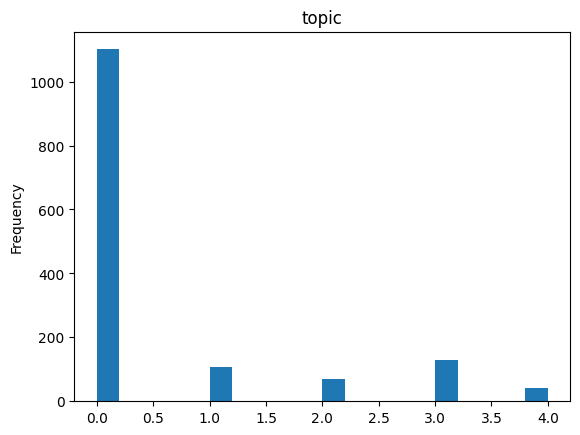

In [ ]:
# Show topic distribution
spam_df['topic'].plot(kind='hist', bins=20, title='topic')

In [ ]:
def topic_vector_mean(df, lda_model):
    topic_vectors = [[] for _ in range(lda_model.num_topics)]

    for index, row in df.iterrows():
        topic = row['topic']
        text_w2v = row['text_w2v']

        if topic >= 0 and topic < lda_model.num_topics:
            topic_vectors[topic].append(text_w2v)

    topic_means = [np.mean(vectors, axis=0) for vectors in topic_vectors]

    return topic_means

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_vectors = topic_vector_mean(spam_df, lda_model3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy.spatial.distance import cosine

# fuction to calculate cosine similarity for semantic distance
def cosine_similarities_calc(topic_vectors):
  cosine_similarities = np.zeros((len(topic_vectors), len(topic_vectors)))
  for i in range(len(topic_vectors)):
    for j in range(len(topic_vectors)):
      if i != j:
        cosine_similarities[i, j] = 1 - cosine(topic_vectors[i], topic_vectors[j])
      else:
        cosine_similarities[i, j] = 1.0
  return cosine_similarities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cosine Similarities between Topics:
[[1.         0.96620535 0.87777381 0.93101845 0.47560382]
 [0.96620535 1.         0.83324665 0.93211591 0.46277407]
 [0.87777381 0.83324665 1.         0.84998846 0.73618239]
 [0.93101845 0.93211591 0.84998846 1.         0.53105599]
 [0.47560382 0.46277407 0.73618239 0.53105599 1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Cosine Similarities between Topics')

Text(0.5, 58.7222222222222, 'Topic ID')

Text(95.72222222222221, 0.5, 'Topic ID')

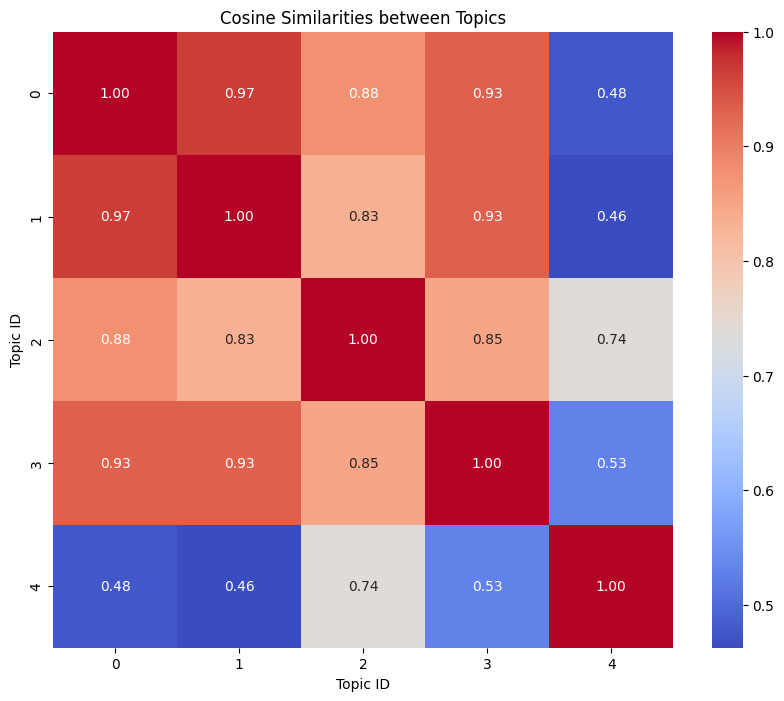

In [ ]:
cosine_similarities = cosine_similarities_calc(topic_vectors)
# Print the cosine similarities
print("Cosine Similarities between Topics:")
print(cosine_similarities)

# Plot heatmap for see cosine distance for each topics vector mean
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cosine Similarities between Topics")
plt.xlabel("Topic ID")
plt.ylabel("Topic ID")
plt.show()

### Comment semantic distance
As I can see only the fifth topic have slighty different vector mean. I try a LDA model with a value of 7 topics to see if it perform better

In [ ]:
# Create a copy of spam_df and delete topic column
spam_df2 = spam_df.copy()
spam_df2 = spam_df.drop('topic', axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model4 = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, num_topics = 7, passes = 10)

pprint(lda_model4.print_topics())
doc_lda4 = lda_model4[corpus] # save documents divided in list of topics
print('='*50)

# Compute Perplexity
perplexity_lda4 = lda_model4.log_perplexity(corpus)
print(f'Perplexity Score: {perplexity_lda4:.2f}')

print('='*50)
# Compute Coherence
coherence_model_lda = CoherenceModel(model = lda_model4, texts=tokenized_texts,
									dictionary = id2word, coherence = 'c_v')
coherence_lda4 = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda4:.2f}')
print('='*50)
vis4 = pyLDAvis.gensim.prepare(lda_model4, corpus, id2word)
vis4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.010*"computron" + 0.008*"contact" + 0.008*"remove" + 0.007*"message" + '
  '0.007*"please" + 0.006*"free" + 0.005*"price" + 0.005*"link" + 0.005*"send" '
  '+ 0.004*"sale"'),
 (1,
  '0.017*"company" + 0.010*"statement" + 0.009*"stock" + 0.008*"font" + '
  '0.007*"height" + 0.007*"security" + 0.007*"information" + 0.006*"width" + '
  '0.006*"investment" + 0.006*"report"'),
 (2,
  '0.005*"online" + 0.005*"need" + 0.004*"prescription" + 0.004*"order" + '
  '0.004*"price" + 0.003*"medication" + 0.003*"drug" + 0.003*"save" + '
  '0.003*"time" + 0.003*"good"'),
 (3,
  '0.012*"pill" + 0.006*"e" + 0.004*"offer" + 0.004*"good" + 0.004*"want" + '
  '0.004*"viagra" + 0.004*"please" + 0.003*"time" + 0.003*"click" + '
  '0.003*"increase"'),
 (4,
  '0.006*"price" + 0.005*"adobe" + 0.004*"window" + 0.004*"software" + '
  '0.004*"office" + 0.004*"color" + 0.004*"font" + 0.004*"account" + '
  '0.004*"professional" + 0.003*"money"'),
 (5,
  '0.004*"price" + 0.002*"good" + 0.002*"want" + 0.002*

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.238114 -0.059951       1        1  30.930899
4      0.023335  0.003729       2        1  17.042227
3     -0.028095  0.064636       3        1  15.074907
0     -0.007011  0.167944       4        1  12.479700
2     -0.014821 -0.015768       5        1   9.330464
6     -0.110017 -0.076062       6        1   7.578155
5     -0.101504 -0.084528       7        1   7.563647, topic_info=           Term        Freq       Total Category  logprob  loglift
151     company  849.000000  849.000000  Default  30.0000  30.0000
343   statement  466.000000  466.000000  Default  29.0000  29.0000
73         pill  304.000000  304.000000  Default  28.0000  28.0000
987   computron  190.000000  190.000000  Default  27.0000  27.0000
9579     height  341.000000  341.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
2420       case   11.436506   52.574476   Topic7  -6.8805   1.0564
1808       pain   11.686067   76.613331   Topic7  -6.8590   0.7014
71         need   12.601158  283.283498   Topic7  -6.7836  -0.5308
735        come   11.682539  118.453903   Topic7  -6.8593   0.2654
617      people   11.492159  102.237592   Topic7  -6.8757   0.3962

[546 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3040      2  0.962715       abdv
715       1  0.022003    account
715       2  0.511577    account
715       3  0.143022    account
715       4  0.209032    account
...     ...       ...        ...
2051      7  0.938358   zimbabwe
1095      4  0.973581  zonedubai
5727      2  0.056063      zyban
5727      3  0.897007      zyban
5727      7  0.056063      zyban

[1499 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 3, 7, 6])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'topic'}, ylabel='Frequency'>

Cosine Similarities between Topics:
[[1.         0.97243032 0.9850012  0.98639098 0.97168863 0.93410231
  0.87193583]
 [0.97243032 1.         0.96219164 0.97262532 0.96157932 0.90036505
  0.82242036]
 [0.9850012  0.96219164 1.         0.99014062 0.96068341 0.94270903
  0.87863272]
 [0.98639098 0.97262532 0.99014062 1.         0.95472711 0.94110978
  0.86976308]
 [0.97168863 0.96157932 0.96068341 0.95472711 1.         0.9256013
  0.86982977]
 [0.93410231 0.90036505 0.94270903 0.94110978 0.9256013  1.
  0.93497396]
 [0.87193583 0.82242036 0.87863272 0.86976308 0.86982977 0.93497396
  1.        ]]


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Cosine Similarities between Topics')

Text(0.5, 58.7222222222222, 'Topic ID')

Text(95.72222222222221, 0.5, 'Topic ID')

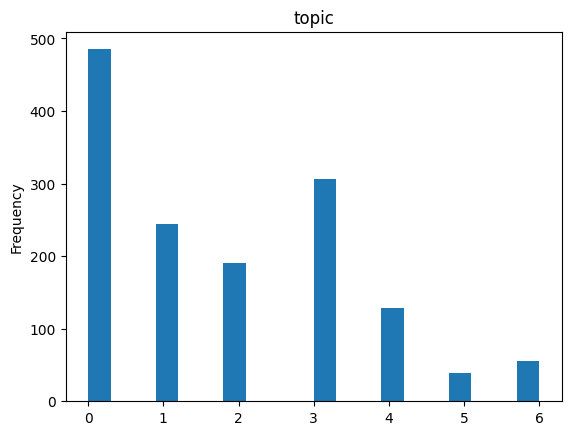

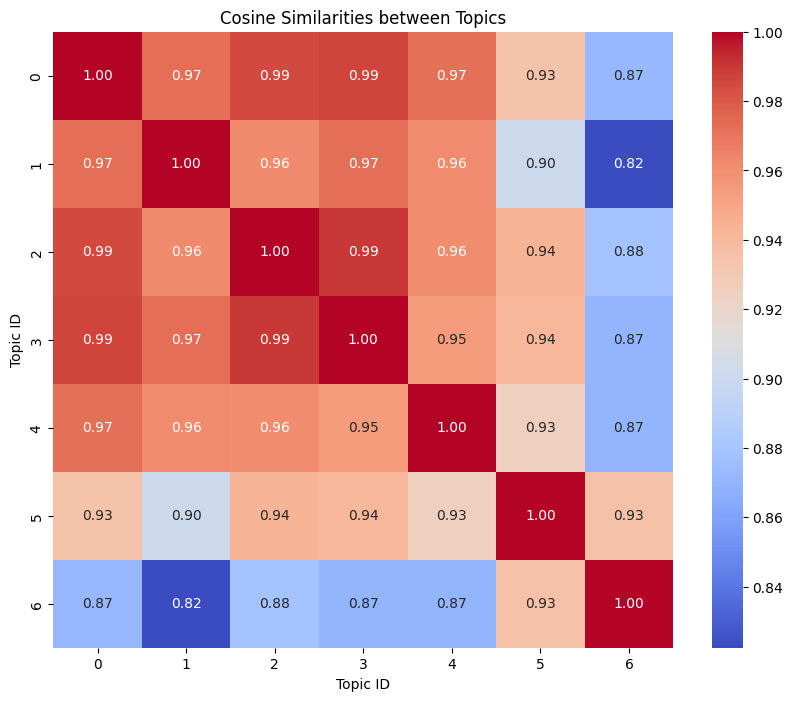

In [ ]:
dominant_topic2 = [sublist[0][0] for sublist in doc_lda4]
spam_df2['topic'] = dominant_topic2

topic_vectors2 = topic_vector_mean(spam_df2, lda_model4)
spam_df2['topic'].plot(kind='hist', bins=20, title='topic')

topic_vectors2 = topic_vector_mean(spam_df2, lda_model4)

cosine_similarities2 = cosine_similarities_calc(topic_vectors2)
print("Cosine Similarities between Topics:")
print(cosine_similarities2)

# Plot heatmap for see cosine distance for each topics vector mean
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities2, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cosine Similarities between Topics")
plt.xlabel("Topic ID")
plt.ylabel("Topic ID")
plt.show()

### Final comment
I decide to use the lda_model3 because the semantic distance is not really different from lda_model4.
As I can deduce the spam mails are similar to each other with slighty different key words